<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/08_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [23]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialization

In [24]:
bc = datasets.load_breast_cancer()

X, Y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,   test_size=0.2, random_state=1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

#Model Prediction

In [25]:
#model = nn.Linear(n_featuresm 1)

In [26]:
input_size = n_features
output_size = 1

#the first approach

#the second approach
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    #difine layers
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [27]:
model = LogisticRegression(input_size)

In [28]:
model

LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

# Loss that is MSE
Mean square error (MSE)

In [29]:
loss = nn.BCELoss()

#Training

In [30]:
lr = 0.01
n = 100

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n):
  #prediction
  y_pred = model(X_train)
  #loss
  L = loss(y_pred,Y_train)
  #gradient
  L.backward()
  #upgdate
  optimizer.step()
  #zero_gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
#    [w,b] = model.parameters()
#    print(f'epoch {epoch + 1}: w = {w[0][0]:.3f}, loss = {L:.5f}')
    print(f'epoch {epoch + 1}: loss = {L.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(Y_test).sum()/float(Y_test.shape[0])
#  acc = (y_predicted_cls == Y_test).sum() / Y_test.size(0)
  print(f'accuracy = {acc:.4f}')


epoch 10: loss = 0.6102
epoch 20: loss = 0.4883
epoch 30: loss = 0.4153
epoch 40: loss = 0.3669
epoch 50: loss = 0.3322
epoch 60: loss = 0.3060
epoch 70: loss = 0.2854
epoch 80: loss = 0.2685
epoch 90: loss = 0.2545
epoch 100: loss = 0.2425
accuracy = 0.8947


In [32]:
preds = model(X_test).detach().numpy()

#Visualization

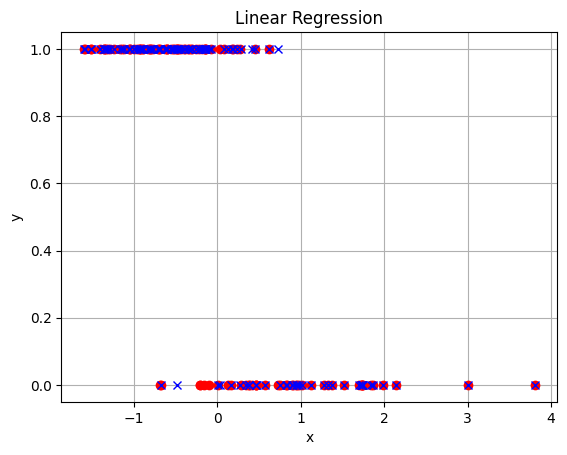

In [36]:
plt.plot(X_test[:,0], Y_test,'ro')
plt.plot(X_test[:,0], y_predicted_cls,'bx')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')